In [1]:
import pandas as pd
import numpy as np

In [2]:
diamonds = pd.read_csv("../diamonds-datamad0820/train.csv")

In [3]:
diamonds.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.12,Premium,H,SI1,61.6,59.0,6.67,6.63,4.10,5363
1,1,1.14,Very Good,E,SI2,60.0,54.0,6.74,6.97,4.11,5593
2,2,0.90,Very Good,D,SI2,60.3,63.0,6.12,6.22,3.72,3534
3,3,0.71,Ideal,E,VS1,61.9,54.0,5.74,5.76,3.56,3212
4,4,0.34,Very Good,F,SI2,60.0,62.0,4.51,4.55,2.72,447


In [4]:
diamonds.set_index("id", inplace=True)

In [5]:
diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.12,Premium,H,SI1,61.6,59.0,6.67,6.63,4.10,5363
1,1.14,Very Good,E,SI2,60.0,54.0,6.74,6.97,4.11,5593
2,0.90,Very Good,D,SI2,60.3,63.0,6.12,6.22,3.72,3534
3,0.71,Ideal,E,VS1,61.9,54.0,5.74,5.76,3.56,3212
4,0.34,Very Good,F,SI2,60.0,62.0,4.51,4.55,2.72,447


In [6]:
diamonds.shape

(40455, 10)

In [7]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   x        40455 non-null  float64
 7   y        40455 non-null  float64
 8   z        40455 non-null  float64
 9   price    40455 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.4+ MB


In [8]:
diamonds.cut.value_counts()

Ideal        16250
Premium      10342
Very Good     9026
Good          3639
Fair          1198
Name: cut, dtype: int64

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
diamonds.cut = le.fit_transform(diamonds.cut)

In [10]:
diamonds.color.value_counts()

G    8565
E    7344
F    7162
H    6147
D    5063
I    4052
J    2122
Name: color, dtype: int64

In [11]:
le = preprocessing.LabelEncoder()
diamonds.color = le.fit_transform(diamonds.color)

In [12]:
diamonds.clarity.value_counts()

SI1     9806
VS2     9204
SI2     6865
VS1     6099
VVS2    3778
VVS1    2776
IF      1365
I1       562
Name: clarity, dtype: int64

In [13]:
le = preprocessing.LabelEncoder()
diamonds.clarity = le.fit_transform(diamonds.clarity)

In [14]:
diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.12,3,4,2,61.6,59.0,6.67,6.63,4.10,5363
1,1.14,4,1,3,60.0,54.0,6.74,6.97,4.11,5593
2,0.90,4,0,3,60.3,63.0,6.12,6.22,3.72,3534
3,0.71,2,1,4,61.9,54.0,5.74,5.76,3.56,3212
4,0.34,4,2,3,60.0,62.0,4.51,4.55,2.72,447


In [15]:
columnas = [a for a in diamonds.columns if a not in ["price"]]
X = diamonds[columnas]
y = diamonds["price"]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)

## Vamos a realizar un ánalisis individual de varios tipos de modelos para entrenar nuestro dataset. En un primer momento nos vamos a quedar sólo con aquellos modelos cuya desviación esté por debajo de los 1000$, para posteriomente realizar un cross validation de los mejores y quedarnos con aquel modelo que mejor resultado nos dé.

### LinearRegression ( Desviación por encima de 1000$, no es un modelo óptimo).

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [18]:
y_pred

array([  264.0733401 ,  4717.90111867,  6209.0855223 , ...,
        4145.00354126,  -690.64859338, 13496.087889  ])

In [19]:
# explained_variance_score, max_error, mean_absolute_error, mean_squared_error, mean_squared_log_error.
# median_absolute_error, r2_score, mean_poisson_deviance, mean_gamma_deviance, mean_tweedie_deviance.

In [20]:
from sklearn.metrics import  explained_variance_score, max_error, mean_absolute_error, mean_squared_error, r2_score

print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))

RMSE 1353.33


### ARDRegression ( Desviación por encima de 1000$, no es un modelo óptimo).

In [118]:
from sklearn.linear_model import ARDRegression

model = ARDRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([  263.50116942,  4719.40474156,  6206.28588713, ...,
        4148.91492504,  -687.45524073, 13495.95254776])

In [119]:
print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))

RMSE 1352.583


### DecisionTreeRegressor (Desviación por debajo de 1000$, podría ser un modelo óptimo).

In [114]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([  357.,  4269.,  5951., ...,  3997.,   990., 13991.])

In [115]:
print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))

RMSE 789.799


### RandomForestRegressor (Desviación cercana a los 500$, podría ser un modelo óptimo).

In [122]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=500, max_depth=20, min_samples_split=8, max_features= "auto", random_state=4)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([  388.37995558,  4614.50797162,  5296.02273862, ...,
        4029.52862819,   976.28973156, 13137.17937799])

In [123]:
print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))

RMSE 592.065


### MLPRegressor (Desviación por encima de 1000$, no es un modelo óptimo).

In [43]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([ -533.10701833,  5073.78388589,  6823.85537994, ...,
        3751.06868184,  -393.42814449, 12563.90667641])

In [44]:
print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))

RMSE 1275.512


### LassoCV (Desviación por encima de 1000$, no es un modelo óptimo).

In [49]:
from sklearn.linear_model import LassoCV

model = LassoCV()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([  163.294856  ,  4778.87260602,  6247.92168641, ...,
        4171.05280013,  -732.35746631, 13382.16093807])

In [50]:
print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))

RMSE 1355.679


### Ridge (Desviación por encima de 1000$, no es un modelo óptimo).

In [53]:
from sklearn.linear_model import Ridge

model = Ridge()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([  257.43159419,  4722.00861303,  6212.49625027, ...,
        4145.60322997,  -693.76228084, 13487.58852475])

In [54]:
print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))

RMSE 1353.496


### RidgeCV  (Desviación por encima de 1000$, no es un modelo óptimo).

In [55]:
from sklearn.linear_model import RidgeCV

model = RidgeCV()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([  257.43159338,  4722.00861319,  6212.49625066, ...,
        4145.6032302 ,  -693.76228114, 13487.58852607])

In [56]:
print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))

RMSE 1353.496


### ElasticNetCV (Desviación por encima de 2000$, no es un modelo óptimo).

In [57]:
from sklearn.linear_model import ElasticNetCV

model = ElasticNetCV()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([1602.76955406, 4566.69415759, 5266.38882093, ..., 4451.41189423,
       2229.56107518, 7534.00069468])

In [58]:
print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))

RMSE 2743.991


### AdaBoostRegressor (Desviación por encima de 1000$, no es un modelo óptimo).

In [59]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([ 1218.62655971,  4721.70271769,  6868.51487544, ...,
        4962.58923952,  1578.9385808 , 13976.44005848])

In [60]:
print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))

RMSE 1338.118


### ExtraTreesRegressor (Desviación cercana a los 500$, podría ser un modelo óptimo).

In [120]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([  381.7 ,  4703.86,  5204.87, ...,  4080.15,   992.16, 13163.06])

In [121]:
print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))

RMSE 585.498


### GradientBoostingRegressor  (Desviación cercana a los 500$, podría ser un modelo óptimo).

In [75]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([  665.34418694,  4431.24274307,  5765.96024001, ...,
        3917.58591758,   899.1781698 , 13781.50762209])

In [76]:
print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))

RMSE 692.373


### VotingRegressor (Desviación cercana a los 500$, podría ser un modelo óptimo).

In [235]:
from sklearn.ensemble import VotingRegressor

r1 = ExtraTreesRegressor(n_estimators=500, max_depth=20, min_samples_split=8, max_features= "auto", random_state=4)
r2 = RandomForestRegressor(n_estimators=400, max_depth=20, min_samples_split=6, max_features= "auto", random_state=4)
#Selecciono estos dos, porque son los que mejores valores nos han dado anteriomente.

model = VotingRegressor([('etr', r1), ('rf', r2)])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([  390.49376998,  4649.26944475,  5299.63010514, ...,
        4058.49137615,   982.37673932, 13097.96850538])

In [236]:
print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))

RMSE 576.533


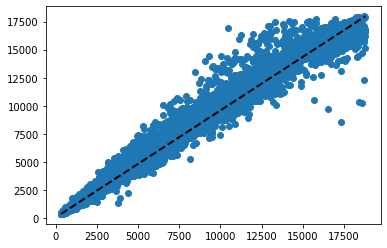

In [136]:
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.scatter(y_test,y_pred)
plt.pyplot.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)

### HistGradientBoostingRegressor (Desviación cercana a los 500$, podría ser un modelo óptimo).

In [90]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([  507.97049464,  4879.42004303,  5391.45239747, ...,
        4181.9560624 ,   980.8155126 , 13147.01155223])

In [91]:
print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))

RMSE 576.21


### SGDRegressor (Desviación cercana a los 500$, podría ser un modelo óptimo).

In [97]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(),
                    SGDRegressor())
 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([  333.77718384,  4714.52004735,  6179.37480288, ...,
        4103.9483863 ,  -735.19329364, 13441.65377653])

In [98]:
print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))

RMSE 1357.398



## RESUMEN –––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

### En base a los resultados obtenidos anteriormente, finalmente nos quedamos con:
    
    - DecisionTreeRegressor.
    - RandomForestRegressor.
    - ExtraTreesRegressor.
    - GradientBoostingRegressor.
    - VotingRegressor.
    - HistGradientBoostingRegressor.